In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as seb

In [6]:
file1 = "D:/clinicaltrial_data.csv"

In [7]:
file2 = "D:/mouse_drug_data.csv"

In [77]:
clinical_trial_df = pd.read_csv(file1, low_memory=False)

In [78]:
mouse_drug_df = pd.read_csv(file2, low_memory=False)

In [79]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [80]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [81]:
clinical_trial_df.isnull().sum()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [83]:
mouse_drug_df.isnull().sum()

Mouse ID    0
Drug        0
dtype: int64

In [82]:
clinical_trial_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [84]:
mouse_drug_df.dtypes

Mouse ID    object
Drug        object
dtype: object

In [85]:
combined_data = pd.merge(clinical_trial_df,mouse_drug_df, on="Mouse ID")
combined_data = combined_data.rename(columns={"Tumor Volume (mm3)":"Tumor Volume in cubic millimeters"})
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume in cubic millimeters,Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [86]:
combined_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume in cubic millimeters',
       'Metastatic Sites', 'Drug'],
      dtype='object')

In [18]:
mouse_check = combined_data['Mouse ID'].drop_duplicates()
mouse_check.value_counts();

In [19]:
combined_data['Timepoint'].value_counts()

0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64

In [20]:
combined_data['Drug'].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [21]:
Capomulin_df = combined_data.loc[combined_data['Drug'] == 'Capomulin']
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume in cubic millimeters,Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [22]:
Capomulin_df.dtypes

Mouse ID                              object
Timepoint                              int64
Tumor Volume in cubic millimeters    float64
Metastatic Sites                       int64
Drug                                  object
dtype: object

In [23]:
Capo_x_axis = Capomulin_df['Timepoint']
Capo_x_axis;

In [24]:
Capo_y_axis = Capomulin_df['Tumor Volume in cubic millimeters']

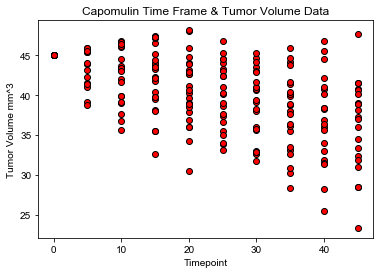

In [25]:
plt.title("Capomulin Time Frame & Tumor Volume Data")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Capo_x_axis, Capo_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [26]:
Capo_tumor_mean = Capomulin_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].mean()
Capo_tumor_mean

,Timepoint,Tumor Volume in cubic millimeters
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


In [27]:
Capo_tumor_sem = Capomulin_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].sem()
Capo_tumor_sem = Capo_tumor_sem.fillna(0)
Capo_tumor_sem

,Timepoint,Tumor Volume in cubic millimeters
0,0.0,0.000000
1,1.0,0.448593
2,1.0,0.702684
3,1.0,0.838617
4,1.0,0.909731
5,1.0,0.881642
6,1.0,0.934460
7,1.0,1.052241
8,1.0,1.223608
9,1.0,1.223977


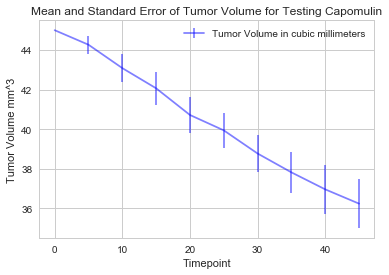

In [28]:
plt.errorbar(np.arange(0,50,5), Capo_tumor_mean['Tumor Volume in cubic millimeters'], yerr=Capo_tumor_sem['Tumor Volume in cubic millimeters'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Tumor Volume for Testing Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")

plt.legend(loc="upper right", fontsize="small", fancybox=True)
seb.set()
seb.set_style("whitegrid")
plt.show()

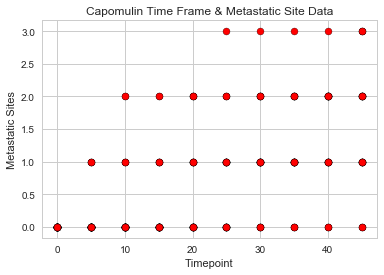

In [29]:
Capo_x_axis = Capomulin_df['Timepoint']
Capo_y_axis = Capomulin_df['Metastatic Sites']
plt.title("Capomulin Time Frame & Metastatic Site Data")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")
plt.scatter(Capo_x_axis, Capo_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [30]:
Capo_Metastatic_mean = Capomulin_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].mean()
Capo_Metastatic_mean

,Timepoint,Metastatic Sites
0,0,0.000000
1,5,0.160000
2,10,0.320000
3,15,0.375000
4,20,0.652174
5,25,0.818182
6,30,1.090909
7,35,1.181818
8,40,1.380952
9,45,1.476190


In [31]:
Capo_Metastatic_sem = Capomulin_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].sem()
Capo_Metastatic_sem = Capo_Metastatic_sem.fillna(0)
Capo_Metastatic_sem

,Timepoint,Metastatic Sites
0,0.0,0.000000
1,1.0,0.074833
2,1.0,0.125433
3,1.0,0.132048
4,1.0,0.161621
5,1.0,0.181818
6,1.0,0.172944
7,1.0,0.169496
8,1.0,0.175610
9,1.0,0.202591


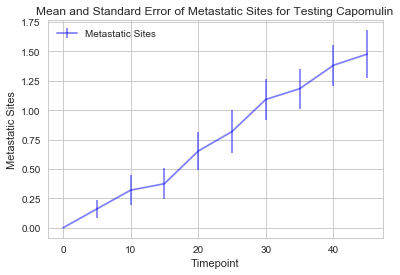

In [32]:
plt.errorbar(np.arange(0,50,5), Capo_Metastatic_mean['Metastatic Sites'], yerr=Capo_Metastatic_sem['Metastatic Sites'], color="b",alpha=0.5)


plt.title("Mean and Standard Error of Metastatic Sites for Testing Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")



plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

In [33]:
Capo_time_calc = Capomulin_df['Timepoint'].value_counts()
Capo_time_calc = Capo_time_calc.to_frame()
Capo_time_calc['Time Value'] = Capo_time_calc.index
Capo_time_calc = Capo_time_calc.rename(columns={"Timepoint":"Number of Mice"})
Capo_time_calc.sort_index()

,Number of Mice,Time Value
0,25,0
5,25,5
10,25,10
15,24,15
20,23,20
25,22,25
30,22,30
35,22,35
40,21,40
45,21,45


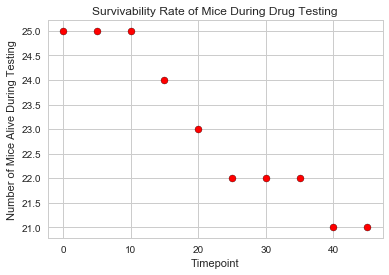

In [34]:
Capo_x_axis = Capo_time_calc['Time Value']
Capo_y_axis = Capo_time_calc['Number of Mice']
plt.title("Survivability Rate of Mice During Drug Testing")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice Alive During Testing")
plt.scatter(Capo_x_axis, Capo_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [35]:
Capo_Metastatic_mean = Capomulin_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].mean()
Capo_Metastatic_mean

,Timepoint,Metastatic Sites
0,0,0.000000
1,5,0.160000
2,10,0.320000
3,15,0.375000
4,20,0.652174
5,25,0.818182
6,30,1.090909
7,35,1.181818
8,40,1.380952
9,45,1.476190


In [36]:
Ketapril_df = combined_data.loc[combined_data['Drug'] == 'Ketapril']
Ketapril_df.head()

,Mouse ID,Timepoint,Tumor Volume in cubic millimeters,Metastatic Sites,Drug
10,f932,0,45.000000,0,Ketapril
11,g107,0,45.000000,0,Ketapril
12,g107,5,48.791665,0,Ketapril
13,g107,10,53.435987,0,Ketapril
14,g107,15,58.135545,0,Ketapril


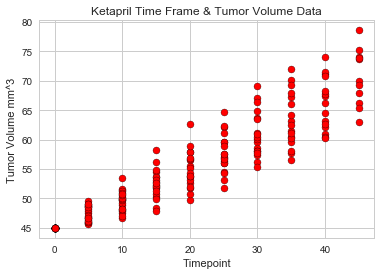

In [37]:
plt.title("Ketapril Time Frame & Tumor Volume Data")
Keta_x_axis = Ketapril_df['Timepoint']
Keta_y_axis = Ketapril_df['Tumor Volume in cubic millimeters']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Keta_x_axis, Keta_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [38]:
Keta_tumor_mean = Ketapril_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].mean()
Keta_tumor_mean

,Timepoint,Tumor Volume in cubic millimeters
0,0,45.000000
1,5,47.389175
2,10,49.582269
3,15,52.399974
4,20,54.920935
5,25,57.678982
6,30,60.994507
7,35,63.371686
8,40,66.068580
9,45,70.662958


In [39]:
Keta_tumor_sem = Ketapril_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].sem()
Keta_tumor_sem = Keta_tumor_sem.fillna(0)
Keta_tumor_sem

,Timepoint,Tumor Volume in cubic millimeters
0,0.0,0.000000
1,1.0,0.264819
2,1.0,0.357421
3,1.0,0.580268
4,1.0,0.726484
5,1.0,0.755413
6,1.0,0.934121
7,1.0,1.127867
8,1.0,1.158449
9,1.0,1.453186


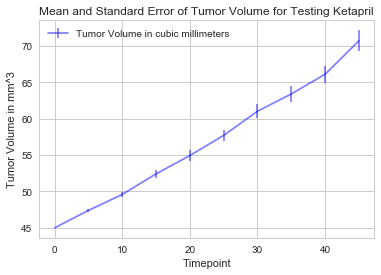

In [40]:
plt.errorbar(np.arange(0,50,5), Keta_tumor_mean['Tumor Volume in cubic millimeters'], yerr=Keta_tumor_sem['Tumor Volume in cubic millimeters'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Tumor Volume for Testing Ketapril")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm^3")

plt.legend(loc="upper left", fontsize="small", fancybox=True)
seb.set()
seb.set_style("whitegrid")

plt.show()

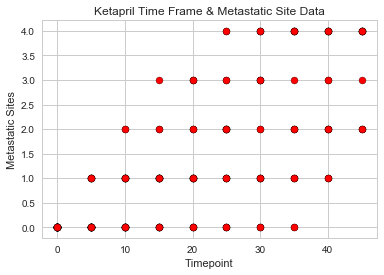

In [41]:
Keta_x_axis = Ketapril_df['Timepoint']
Keta_y_axis = Ketapril_df['Metastatic Sites']
plt.title("Ketapril Time Frame & Metastatic Site Data")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")
plt.scatter(Keta_x_axis, Keta_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [42]:
Keta_Metastatic_mean = Ketapril_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].mean()
Keta_Metastatic_mean

,Timepoint,Metastatic Sites
0,0,0.000000
1,5,0.304348
2,10,0.590909
3,15,0.842105
4,20,1.210526
5,25,1.631579
6,30,2.055556
7,35,2.294118
8,40,2.733333
9,45,3.363636


In [43]:
Keta_Metastatic_sem = Ketapril_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].sem()
Keta_Metastatic_sem = Keta_Metastatic_sem.fillna(0)
Keta_Metastatic_sem

,Timepoint,Metastatic Sites
0,0.0,0.000000
1,1.0,0.098100
2,1.0,0.142018
3,1.0,0.191381
4,1.0,0.236680
5,1.0,0.288275
6,1.0,0.347467
7,1.0,0.361418
8,1.0,0.315725
9,1.0,0.278722


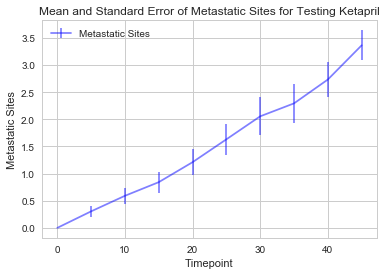

In [44]:
plt.errorbar(np.arange(0,50,5), Keta_Metastatic_mean['Metastatic Sites'], yerr=Keta_Metastatic_sem['Metastatic Sites'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Metastatic Sites for Testing Ketapril")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

In [45]:
Keta_time_calc = Ketapril_df['Timepoint'].value_counts()
Keta_time_calc = Keta_time_calc.to_frame()
Keta_time_calc['Time Value'] = Keta_time_calc.index
Keta_time_calc = Keta_time_calc.rename(columns={"Timepoint":"Number of Mice"})
Keta_time_calc.sort_index()

,Number of Mice,Time Value
0,25,0
5,23,5
10,22,10
15,19,15
20,19,20
25,19,25
30,18,30
35,17,35
40,15,40
45,11,45


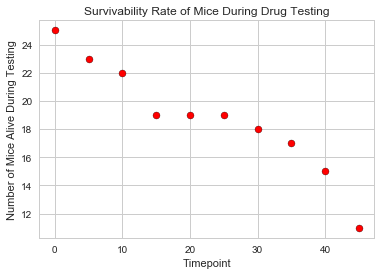

In [46]:
Keta_x_axis = Keta_time_calc['Time Value']
Keta_y_axis = Keta_time_calc['Number of Mice']
plt.title("Survivability Rate of Mice During Drug Testing")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice Alive During Testing")
plt.scatter(Keta_x_axis, Keta_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [47]:
Placebo_df = combined_data.loc[combined_data['Drug'] == 'Placebo']
Placebo_df.head();

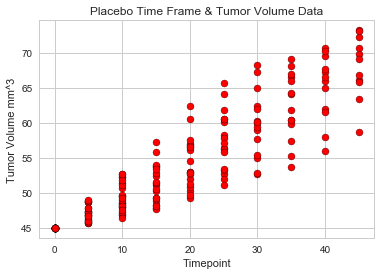

In [48]:
plt.title("Placebo Time Frame & Tumor Volume Data")
Plac_x_axis = Placebo_df['Timepoint']
Plac_y_axis = Placebo_df['Tumor Volume in cubic millimeters']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Plac_x_axis, Plac_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [49]:
Plac_tumor_mean = Placebo_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].mean()
Plac_tumor_mean

,Timepoint,Tumor Volume in cubic millimeters
0,0,45.000000
1,5,47.125589
2,10,49.423329
3,15,51.359742
4,20,54.364417
5,25,57.482574
6,30,59.809063
7,35,62.420615
8,40,65.052675
9,45,68.084082


In [50]:
Plac_tumor_sem = Placebo_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].sem()
Plac_tumor_sem = Plac_tumor_sem.fillna(0)
Plac_tumor_sem

,Timepoint,Tumor Volume in cubic millimeters
0,0.0,0.000000
1,1.0,0.218091
2,1.0,0.402064
3,1.0,0.614461
4,1.0,0.839609
5,1.0,1.034872
6,1.0,1.218231
7,1.0,1.287481
8,1.0,1.370634
9,1.0,1.351726


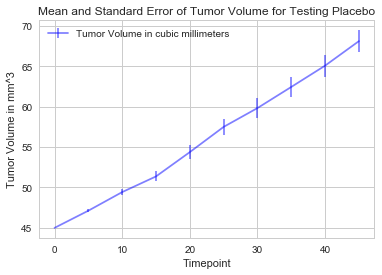

In [51]:
plt.errorbar(np.arange(0,50,5), Plac_tumor_mean['Tumor Volume in cubic millimeters'], yerr=Plac_tumor_sem['Tumor Volume in cubic millimeters'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Tumor Volume for Testing Placebo")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm^3")

plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

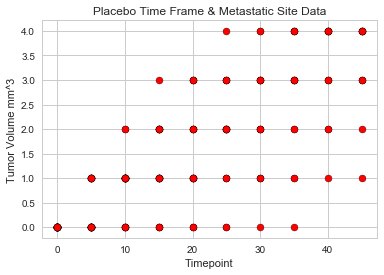

In [52]:
plt.title("Placebo Time Frame & Metastatic Site Data")
Plac_x_axis = Placebo_df['Timepoint']
Plac_y_axis = Placebo_df['Metastatic Sites']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Plac_x_axis, Plac_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [53]:
Plac_Metastatic_mean = Placebo_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].mean()
Plac_Metastatic_mean

,Timepoint,Metastatic Sites
0,0,0.000000
1,5,0.375000
2,10,0.833333
3,15,1.250000
4,20,1.526316
5,25,1.941176
6,30,2.266667
7,35,2.642857
8,40,3.166667
9,45,3.272727


In [54]:
Plac_Metastatic_sem = Placebo_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].sem()
Plac_Metastatic_sem = Plac_Metastatic_sem.fillna(0)
Plac_Metastatic_sem

,Timepoint,Metastatic Sites
0,0.0,0.000000
1,1.0,0.100947
2,1.0,0.115261
3,1.0,0.190221
4,1.0,0.234064
5,1.0,0.263888
6,1.0,0.300264
7,1.0,0.341412
8,1.0,0.297294
9,1.0,0.304240


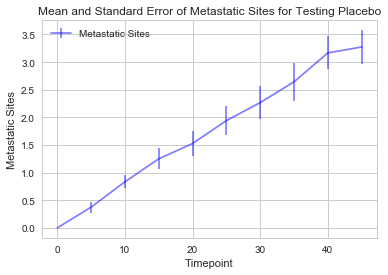

In [55]:
plt.errorbar(np.arange(0,50,5), Plac_Metastatic_mean['Metastatic Sites'], yerr=Plac_Metastatic_sem['Metastatic Sites'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Metastatic Sites for Testing Placebo")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

In [56]:
Plac_time_calc = Placebo_df['Timepoint'].value_counts()
Plac_time_calc = Plac_time_calc.to_frame()
Plac_time_calc['Time Value'] = Plac_time_calc.index
Plac_time_calc = Plac_time_calc.rename(columns={"Timepoint":"Number of Mice"})
Plac_time_calc.sort_index()

,Number of Mice,Time Value
0,25,0
5,24,5
10,24,10
15,20,15
20,19,20
25,17,25
30,15,30
35,14,35
40,12,40
45,11,45


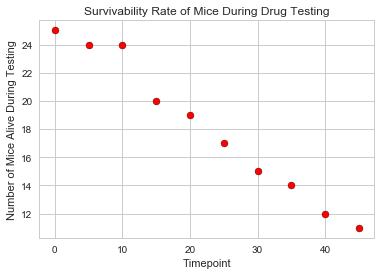

In [57]:
Plac_x_axis = Plac_time_calc['Time Value']
Plac_y_axis = Plac_time_calc['Number of Mice']
plt.title("Survivability Rate of Mice During Drug Testing")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice Alive During Testing")
plt.scatter(Plac_x_axis, Plac_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [58]:
Infubinol_df = combined_data.loc[combined_data['Drug'] == 'Infubinol']
Infubinol_df.head()

,Mouse ID,Timepoint,Tumor Volume in cubic millimeters,Metastatic Sites,Drug
213,c326,0,45.000000,0,Infubinol
214,c326,5,49.340203,0,Infubinol
215,c139,0,45.000000,0,Infubinol
216,c139,5,48.753112,0,Infubinol
217,c139,10,49.992954,0,Infubinol


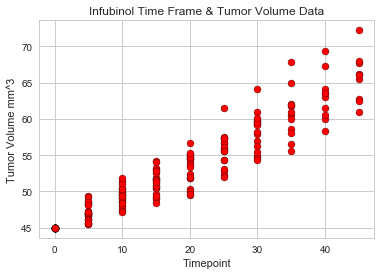

In [59]:
plt.title("Infubinol Time Frame & Tumor Volume Data")
Infub_x_axis = Infubinol_df['Timepoint']
Infub_y_axis = Infubinol_df['Tumor Volume in cubic millimeters']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Infub_x_axis, Infub_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [60]:
Infub_tumor_mean = Infubinol_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].mean()
Infub_tumor_mean

,Timepoint,Tumor Volume in cubic millimeters
0,0,45.000000
1,5,47.062001
2,10,49.403909
3,15,51.296397
4,20,53.197691
5,25,55.715252
6,30,58.299397
7,35,60.742461
8,40,63.162824
9,45,65.755562


In [61]:
Infub_tumor_sem = Infubinol_df.groupby('Timepoint', as_index=False)['Tumor Volume in cubic millimeters'].sem()
Infub_tumor_sem = Infub_tumor_sem.fillna(0)
Infub_tumor_sem

,Timepoint,Tumor Volume in cubic millimeters
0,0.0,0.000000
1,1.0,0.235102
2,1.0,0.282346
3,1.0,0.357705
4,1.0,0.476210
5,1.0,0.550315
6,1.0,0.631061
7,1.0,0.984155
8,1.0,1.055220
9,1.0,1.144427


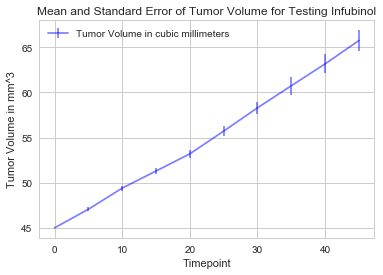

In [62]:
plt.errorbar(np.arange(0,50,5), Infub_tumor_mean['Tumor Volume in cubic millimeters'], yerr=Infub_tumor_sem['Tumor Volume in cubic millimeters'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Tumor Volume for Testing Infubinol")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm^3")

plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

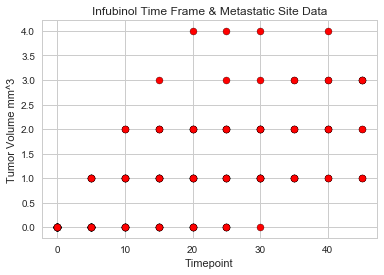

In [63]:
plt.title("Infubinol Time Frame & Metastatic Site Data")
Infub_x_axis = Infubinol_df['Timepoint']
Infub_y_axis = Infubinol_df['Metastatic Sites']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm^3")
plt.scatter(Infub_x_axis, Infub_y_axis, marker = 'o', facecolors = "red", edgecolors="black")

seb.set()
seb.set_style("whitegrid")

In [64]:
Infub_Metastatic_mean = Infubinol_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].mean()
Infub_Metastatic_mean

,Timepoint,Metastatic Sites
0,0,0.000000
1,5,0.280000
2,10,0.666667
3,15,0.904762
4,20,1.050000
5,25,1.277778
6,30,1.588235
7,35,1.666667
8,40,2.100000
9,45,2.111111


In [65]:
Infub_Metastatic_sem = Infubinol_df.groupby('Timepoint', as_index=False)['Metastatic Sites'].sem()
Infub_Metastatic_sem = Infub_Metastatic_sem.fillna(0)
Infub_Metastatic_sem

,Timepoint,Metastatic Sites
0,0.0,0.000000
1,1.0,0.091652
2,1.0,0.159364
3,1.0,0.194015
4,1.0,0.234801
5,1.0,0.265753
6,1.0,0.227823
7,1.0,0.224733
8,1.0,0.314466
9,1.0,0.309320


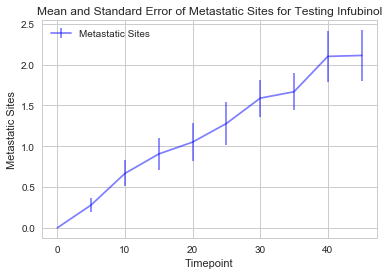

In [66]:
plt.errorbar(np.arange(0,50,5), Infub_Metastatic_mean['Metastatic Sites'], yerr=Infub_Metastatic_sem['Metastatic Sites'], color="b",alpha=0.5)

plt.title("Mean and Standard Error of Metastatic Sites for Testing Infubinol")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

plt.legend(loc="upper left", fontsize="small", fancybox=True)

seb.set()
seb.set_style("whitegrid")

plt.show()

In [67]:
Infub_time_calc = Infubinol_df['Timepoint'].value_counts()
Infub_time_calc = Infub_time_calc.to_frame()
Infub_time_calc['Time Value'] = Infub_time_calc.index
Infub_time_calc = Infub_time_calc.rename(columns={"Timepoint":"Number of Mice"})
Infub_time_calc.sort_index()

,Number of Mice,Time Value
0,25,0
5,25,5
10,21,10
15,21,15
20,20,20
25,18,25
30,17,30
35,12,35
40,10,40
45,9,45


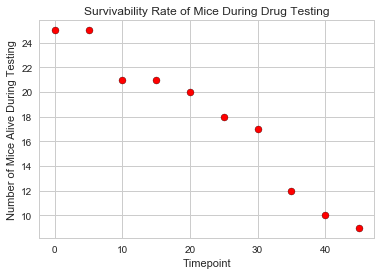

In [68]:
Infub_x_axis = Infub_time_calc['Time Value']
Infub_y_axis = Infub_time_calc['Number of Mice']
plt.title("Survivability Rate of Mice During Drug Testing")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice Alive During Testing")
plt.scatter(Infub_x_axis, Infub_y_axis, marker = 'o', facecolors = "red", edgecolors="black")
seb.set()
seb.set_style("whitegrid")

In [69]:
Capo_tumor_gain_day45 = Capo_tumor_mean.loc[Capo_tumor_mean['Timepoint'] == 45, 'Tumor Volume in cubic millimeters']
Capo_tumor_gain_day0 = Capo_tumor_mean.loc[Capo_tumor_mean['Timepoint'] == 0, 'Tumor Volume in cubic millimeters']
Percent_Tumor_Volume_Change_Capo =((float(Capo_tumor_gain_day45)-Capo_tumor_gain_day0)/Capo_tumor_gain_day0)*100
Percent_Tumor_Volume_Change_Capo

0   -19.475303
Name: Tumor Volume in cubic millimeters, dtype: float64

In [70]:
Keta_tumor_gain_day45 = Keta_tumor_mean.loc[Keta_tumor_mean['Timepoint'] == 45, 'Tumor Volume in cubic millimeters']
Keta_tumor_gain_day0 = Keta_tumor_mean.loc[Keta_tumor_mean['Timepoint'] == 0, 'Tumor Volume in cubic millimeters']
Percent_Tumor_Volume_Change_Keta =((float(Keta_tumor_gain_day45)-Keta_tumor_gain_day0)/Keta_tumor_gain_day0)*100
Percent_Tumor_Volume_Change_Keta

0    57.028795
Name: Tumor Volume in cubic millimeters, dtype: float64

In [71]:
Plac_tumor_gain_day45 = Plac_tumor_mean.loc[Plac_tumor_mean['Timepoint'] == 45, 'Tumor Volume in cubic millimeters']
Plac_tumor_gain_day0 = Plac_tumor_mean.loc[Plac_tumor_mean['Timepoint'] == 0, 'Tumor Volume in cubic millimeters']
Percent_Tumor_Volume_Change_Plac =((float(Plac_tumor_gain_day45)-Plac_tumor_gain_day0)/Plac_tumor_gain_day0)*100
Percent_Tumor_Volume_Change_Plac

0    51.29796
Name: Tumor Volume in cubic millimeters, dtype: float64

In [72]:
Infub_tumor_gain_day45 = Infub_tumor_mean.loc[Infub_tumor_mean['Timepoint'] == 45, 'Tumor Volume in cubic millimeters']
Infub_tumor_gain_day0 = Infub_tumor_mean.loc[Infub_tumor_mean['Timepoint'] == 0, 'Tumor Volume in cubic millimeters']
Percent_Tumor_Volume_Change_Infub =((float(Infub_tumor_gain_day45)-Infub_tumor_gain_day0)/Infub_tumor_gain_day0)*100
Percent_Tumor_Volume_Change_Infub

0    46.123472
Name: Tumor Volume in cubic millimeters, dtype: float64

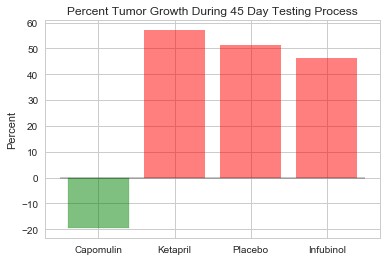

In [75]:
Drugs = [Percent_Tumor_Volume_Change_Capo[0],Percent_Tumor_Volume_Change_Keta[0],Percent_Tumor_Volume_Change_Plac[0],Percent_Tumor_Volume_Change_Infub[0]]
x_axis = np.arange(0,len(Drugs),1)
bar_list = plt.bar(x_axis, Drugs, color='r', alpha=0.5, align="center")
bar_list[0].set_color('g')
bar_list
plt.title("Percent Tumor Growth During 45 Day Testing Process")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ketapril", "Placebo", "Infubinol"])
plt.ylabel("Percent")
plt.hlines(0, -.5, 3.5, alpha=0.25)
seb.set()
seb.set_style("whitegrid")